In [3]:
import pandas as pd

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
from google.colab import files
uploaded = files.upload()

Saving data_for_lr.csv to data_for_lr.csv


In [8]:
data = pd.read_csv('data_for_lr.csv')

In [9]:
data.head(10)

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984
5,36.0,32.463875
6,12.0,10.780897
7,81.0,80.763399
8,25.0,24.612151
9,5.0,6.963319


In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       700 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 11.1 KB


In [38]:
data.isnull()

,x,y
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
695,False,False
696,False,False
697,False,False
698,False,False


In [39]:
data.isnull().sum()

,0
x,0
y,1


 **Data Processing**


In [10]:
data.isnull().sum()

,0
x,0
y,1


In [11]:
data.describe()

,x,y
count,700.000000,699.000000
mean,54.985939,49.939869
std,134.681703,29.109217
min,0.000000,-3.839981
25%,25.000000,24.929968
50%,49.000000,48.973020
75%,75.000000,74.929911
max,3530.157369,108.871618


Splitting data

In [66]:
# train input and output
train_input = np.array(data.x[0:500]).reshape(500,1)
train_output = np.array(data.y[0:500]).reshape(500,1)

#validate data input and output
test_input = np.array(data.x[500:700]).reshape(200,1)
test_ouput = np.array(data.y[500:699]).reshape(199,1)

<font color = "green">Linear Regression</font>

**Forword propagation**

In [28]:
#f(x) = mx+c
def forward_propagation(train_input, parameters):
  m = parameters["m"]
  c = parameters["c"]

  predictions = np.multiply(m, train_input)+c
  return predictions

**COST FUNCTION**

summation(1/2n * (y-f(x))^2

In [29]:
def cost_function(predictions, train_output):
  cost = np.mean((train_output - predictions) **2)* 0.5
  return cost

**Gradient Descent for Backpropagation**

df = f(x) - y

dm = df * x

dc = df *1

In [30]:
def backward_propagation(train_input, train_output, predictions):
  derivatives = dict()
  df = predictions - train_output
  dm = np.mean(np.multiply(df, train_input))
  dc = np.mean(df)

  derivatives["dm"] = dm
  derivatives["dc"] = dc

  return derivatives

**Update Parameters**

m = m - (learning_rate * dm )

c = c - (learning_rate * dc )

In [40]:
def update_parameters(parameters, derivatives, learning_rate):
  parameters["m"] = parameters["m"] - learning_rate * derivatives["dm"]
  parameters["c"] = parameters["c"] - learning_rate * derivatives["dc"]

  return parameters

In [45]:
def train(train_input, trian_output, learning_rate, iters):

  # random parameters
  parameters = dict()
  parameters["m"] = np.random.randn(1)
  parameters["c"] = np.random.randn(1)


  plt.figure()

  #loss
  loss = list()

  #iteration
  for i in range(iters):
    # forward propagation
    predictions = forward_propagation(train_input, parameters)

    #cost function
    cost = cost_function(predictions, train_output)

    loss.append(cost)
    print(f"Iteration = {i+1}, Loss = {cost}")

    #plot
    fig, ax = plt.subplots()

    ax.plot(train_input, train_output, "+", label = "Training Data")
    ax.plot(train_input, predictions, "+", label = "Predictions")
    plt.show()

    #back propagation
    derivatives = backward_propagation(train_input, train_output, predictions)

    #update the parameters
    parameters = update_parameters(parameters, derivatives, learning_rate)

    return parameters

**Training**

Iteration = 1, Loss = nan


<Figure size 640x480 with 0 Axes>

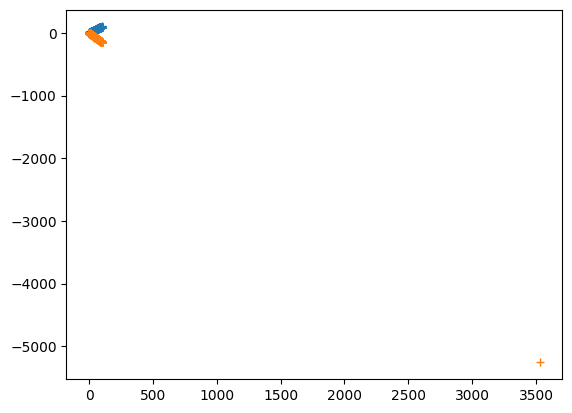

In [55]:
parameters, loss = train(train_input, train_output, 0.1, 20)

In [59]:
print(parameters)

m


In [57]:
loss

'c'

**Lets Predict**

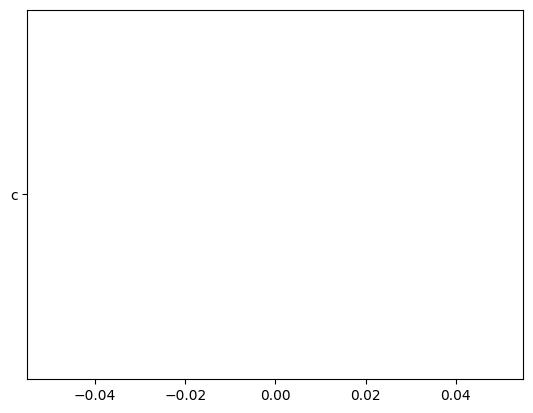

In [60]:
plt.plot(loss)

In [67]:
test_predictions = test_input * parameters["m"] + parameters["c"]

TypeError: string indices must be integers

ValueError: x and y must have same first dimension, but have shapes (200, 1) and (199, 1)

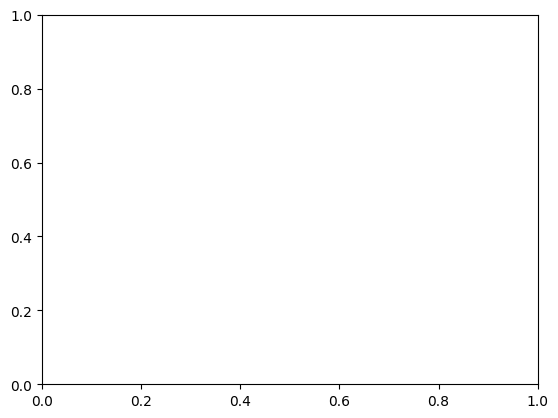

In [62]:
plt.plot(test_input, test_ouput, "+", label = "Test Data")
plt.plot(test_input, test_predictions, "+", label = "Predictions")
plt.show()